In [51]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [52]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [53]:
train_images = train_images.astype('float32') / 255.0
test_images =test_images.astype('float32') / 255.0

In [54]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

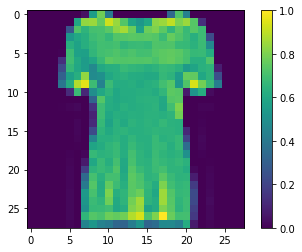

In [55]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

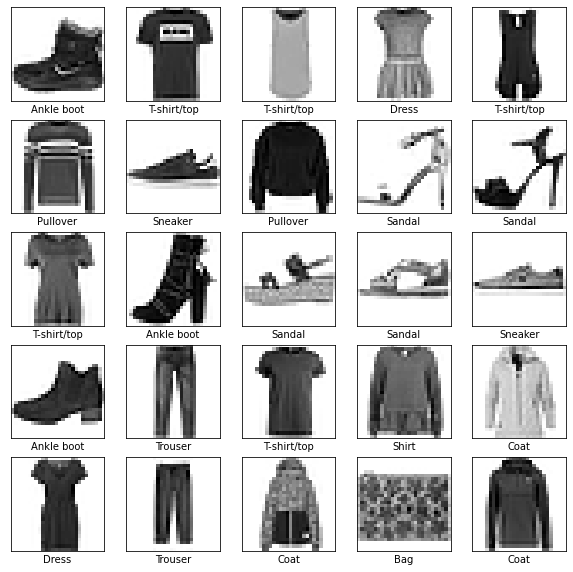

In [56]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [57]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
       tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [59]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [60]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 1s 4ms/step - loss: 1.2058 - accuracy: 0.5955 - val_loss: 0.5127 - val_accuracy: 0.8243
Epoch 2/10
112/112 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.8347 - val_loss: 0.4615 - val_accuracy: 0.8317
Epoch 3/10
112/112 [==============================] - 0s 4ms/step - loss: 0.4208 - accuracy: 0.8500 - val_loss: 0.4023 - val_accuracy: 0.8563
Epoch 4/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3879 - accuracy: 0.8640 - val_loss: 0.3827 - val_accuracy: 0.8653
Epoch 5/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3614 - accuracy: 0.8716 - val_loss: 0.3697 - val_accuracy: 0.8720
Epoch 6/10
112/112 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.8784 - val_loss: 0.3542 - val_accuracy: 0.8773
Epoch 7/10
112/112 [==============================] - 0s 3ms/step - loss: 0.3274 - accuracy: 0.8835 - val_loss: 0.3521 - val_accuracy: 0.8723
Epoch 

In [61]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3604 - accuracy: 0.8703

Test accuracy: 0.8702999949455261


In [62]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [63]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

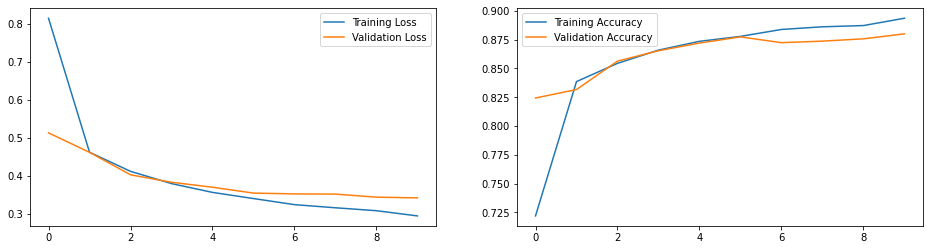

In [64]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [65]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3604 - accuracy: 0.8703
0.3603588938713074
0.8702999949455261


In [66]:
predictions = model.predict(test_images)

In [67]:
print(predictions)

[[ -3.5811703   -9.185318    -2.5834339  ...   4.4733343    0.2069585
    8.305785  ]
 [  3.2091978   -2.7129717   13.037595   ...  -7.6506968    0.18066779
   -9.987357  ]
 [  5.5945344   14.865838     3.4691858  ...  -1.9733773    0.40065774
   -7.0251403 ]
 ...
 [  2.6350174   -4.035986    -0.95542645 ...  -2.9705038    6.753767
  -10.365478  ]
 [  0.09063161  13.916095     2.8642836  ...  -0.8723387   -1.2906591
   -4.295936  ]
 [ -1.480318    -7.0213895   -2.6535692  ...   1.7295865    0.4248588
   -2.3054824 ]]


In [68]:
import numpy as np

print(np.argmax(predictions[0]))

9


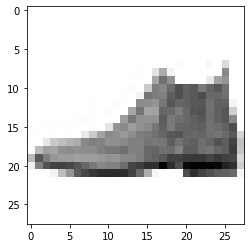

In [69]:
plt.imshow(test_images[0],cmap=plt.cm.binary)
plt.show()

In [70]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

array([6, 3, 2, ..., 3, 0, 5])

In [71]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[4766,    4,   64,  229,   24,    5,  603,    0,   23,    0],
       [   5, 5562,    5,   87,   14,    0,    5,    0,    1,    0],
       [  44,    3, 4161,   91, 1051,    0,  353,    0,    7,    0],
       [  67,   26,   21, 5343,  167,    0,   63,    0,    1,    0],
       [   3,    6,  187,  199, 5127,    0,  169,    0,    6,    0],
       [   2,    0,    0,    6,    0, 5587,    0,   77,    3,   25],
       [ 526,    5,  304,  211,  648,    0, 3985,    0,   23,    0],
       [   0,    0,    0,    0,    0,  130,    0, 5292,   15,  251],
       [  15,    2,   15,   29,   43,    9,   32,   10, 5557,    1],
       [   1,    1,    0,    0,    0,   30,    0,   92,    3, 5578]],
      dtype=int32)>

In [72]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

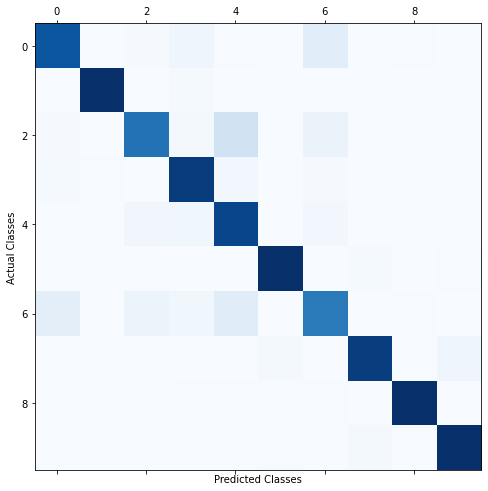

In [73]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()